In [202]:
######################################
###          DATA STORY            ###
######################################

In [203]:
### Imports ###
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as sstats

from pyechonest import config
from pyechonest import song
from pyechonest import artist

# Function used in this notebook
import dataStoryFunctions as dsf

In [204]:
### Main Code ###

In [205]:
# Set ECHO_NEST_API_KEY value
config.ECHO_NEST_API_KEY = "V2KYAQQLNXM5FEUUU"

In [206]:
# Define the starting and ending years 
start_year = 1960
end_year = 2014

In [207]:
# Create a list containing all the years we are interested in
years = dsf.create_years_list(start_year, end_year)

In [208]:
# Creation of the global dataframe
billboard_df = dsf.create_billboard_df_from_CSV(start_year, years)

In [209]:
#billboard_df.head()
#billboard_df.tail()

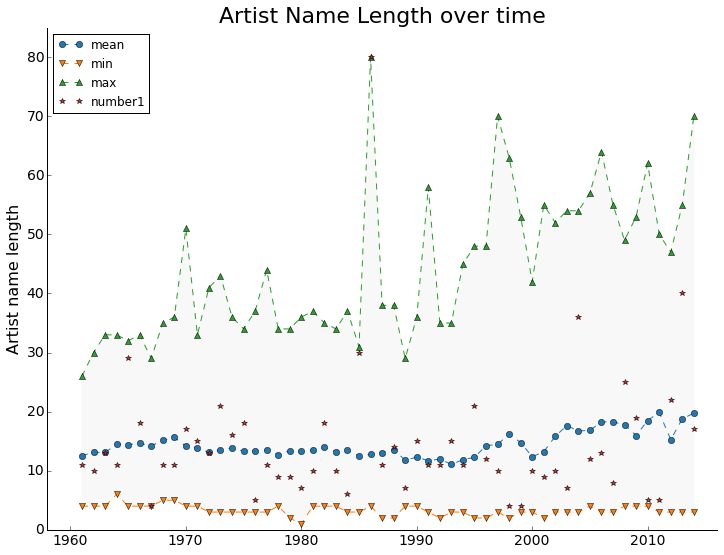

In [210]:
# Plot the Artist Name Length vs the year
dsf.create_name_length_plot('Artist(s)', billboard_df, years, start_year, end_year,
                     "Artist name length", "Artist Name Length over time",
                 "Images/Artist-name-length-over-time.png", 2) 

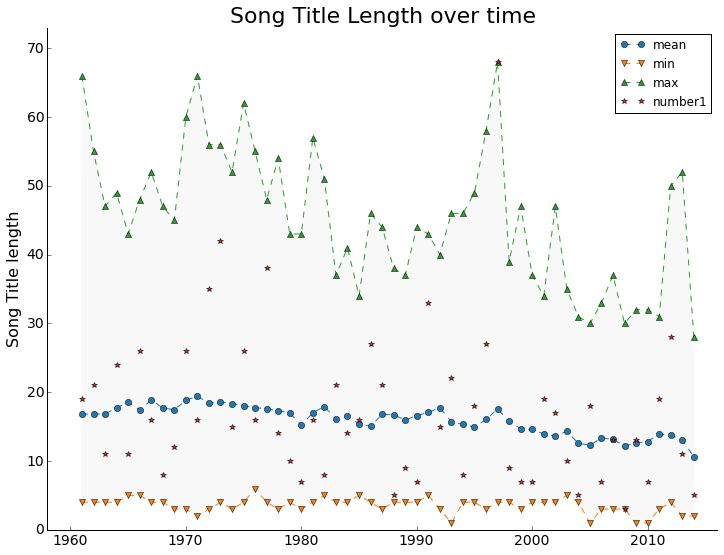

In [211]:
# Plot the Song Title Length vs the year
dsf.create_name_length_plot('Title', billboard_df, years, start_year, end_year,
                     "Song Title length", "Song Title Length over time",
                 "Images/Song-title-length-over-time.png", 1) 

In [212]:
# Number of featurings over time

In [213]:
# Total number of songs
total_songs = billboard_df['Title'].count()
print "Total songs:", total_songs
# 5501 songs because two numbers 100 in 1969

# Total number of featurings
billboard_df_featurings = billboard_df[billboard_df['Artist(s)'].str.contains("featuring")]
total_featurings = billboard_df_featurings['Title'].count()
print "Total featurings:", total_featurings

# Proportion of featurings
featuring_proportion = total_featurings / float(total_songs) * 100
print "Featuring proportion:", featuring_proportion, "%"

# Years where a featuring has been ranked #1
years_featuring_number1 = billboard_df_featurings[billboard_df_featurings['Num'] == 1]['Year']
print "Years where a featuring has been #1: ", years_featuring_number1.tolist()

Total songs: 5501
Total featurings: 520
Featuring proportion: 9.45282675877 %
Years where a featuring has been #1:  [1985, 1995, 2004, 2008, 2012, 2013]


In [214]:
# Creation of a new dataframe for the featuring number
billboard_df_featurings.loc[:,'Counts']  = billboard_df_featurings.groupby('Year')['Year'].transform('count')
billboard_df_featurings_count = pd.concat([billboard_df_featurings['Year'], 
                                           billboard_df_featurings['Counts']], axis=1,
                                          keys=['Year', 'Counts'])

billboard_df_featurings_count = billboard_df_featurings_count.groupby('Year').count().reset_index()


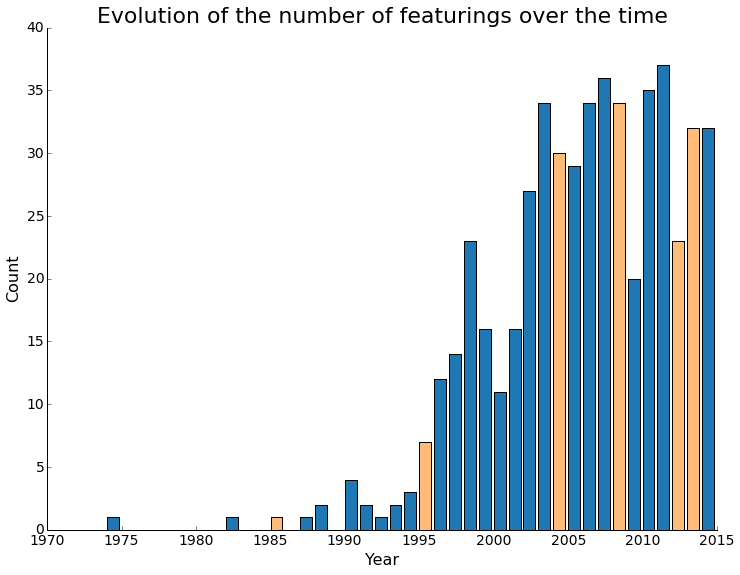

In [270]:
dsf.create_bar_chart_featurings(billboard_df_featurings_count['Year'], 
                            billboard_df_featurings_count['Counts'], 
                           "Year",
                           "Count",
                           "Evolution of the number of featurings over the time",
                           "Images/Featuring-number-over-time.png",
                               years_featuring_number1.tolist())

In [216]:
# Number of songs by artist in the Top 100

In [217]:
billboard_df_artist_count = dsf.create_entries_count_by_artist(billboard_df, start_year, end_year)
billboard_df_artist_count.head(10)

,Lead Artist(s),Counts
1244,Madonna,36
1252,Mariah Carey,29
1619,Rihanna,27
1885,The Beatles,26
636,Elton John,26
909,Janet Jackson,23
1316,Michael Jackson,22
1808,Stevie Wonder,22
2241,Whitney Houston,21
2197,Usher,20


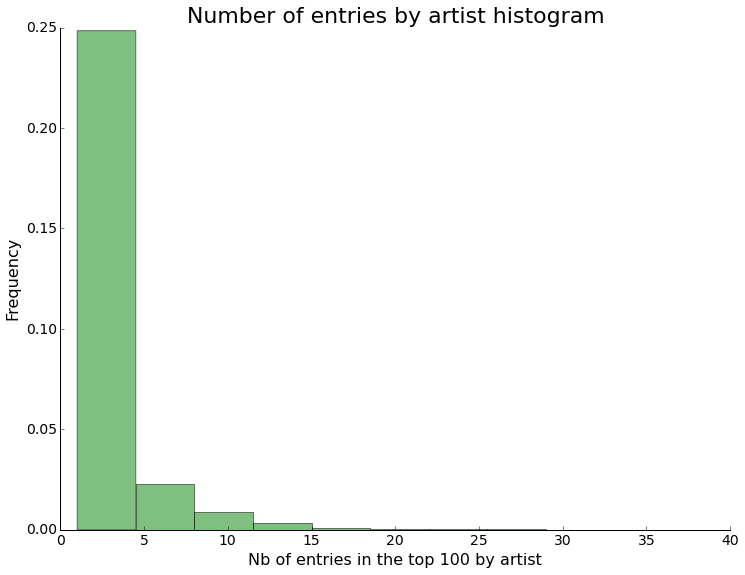

In [218]:
dsf.create_histogram_nb_entries(billboard_df_artist_count["Counts"], 
                            "Nb of entries in the top 100 by artist", 
                            "Frequency", 
                            "Number of entries by artist histogram", 
                            "Images/histogram_entries_by_artist.png")

In [219]:
cumulative_count_df = dsf.create_cumulative_counts_df(billboard_df_artist_count)

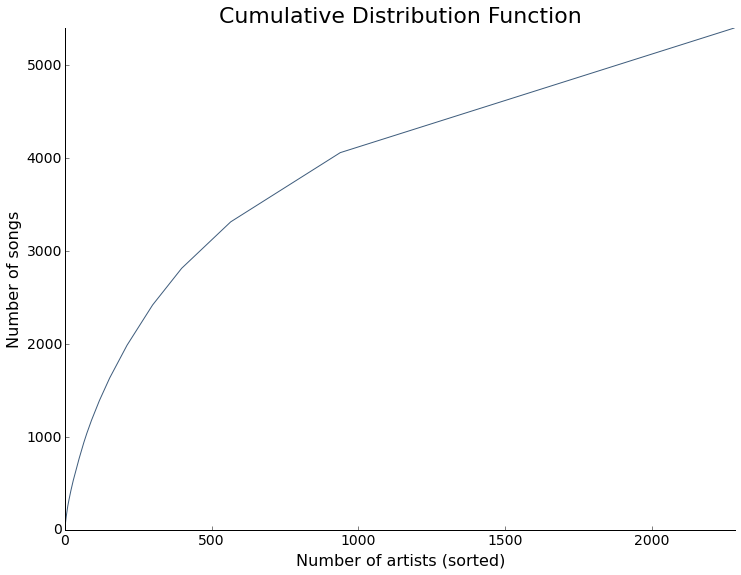

In [220]:
dsf.plot_cumulative_distribution_function(cumulative_count_df, 'Number of artists (sorted)',
                                         'Number of songs',
                                         'Cumulative Distribution Function',
                                         "Images/cdf_songs_x_artists.png")

In [221]:
cumulative_count_reverse_df = dsf.create_cumulative_counts_reverse_df(billboard_df_artist_count)

In [222]:
total_nb_songs = cumulative_count_reverse_df.tail(1)["Cumulative Count Reverse"].tolist()[0]
print "Total number of songs:", total_nb_songs

Total number of songs: 5401


In [223]:
total_nb_artists = cumulative_count_reverse_df.tail(1)["Cumulative Count Reverse"].index.tolist()[0]
print "Total number of artists:", total_nb_artists

Total number of artists: 2279


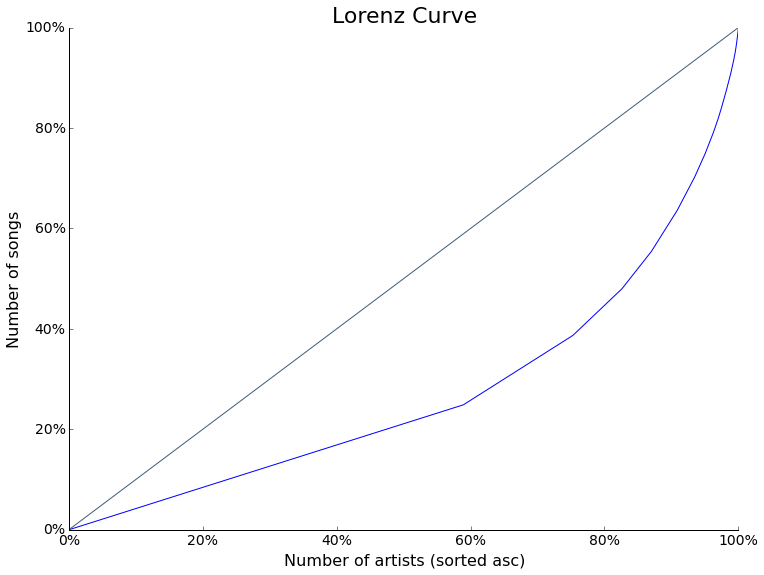

In [224]:
dsf.plot_lorenz_curve(cumulative_count_reverse_df, total_nb_songs, total_nb_artists,
                      "Number of artists (sorted asc)", 
                      "Number of songs", "Lorenz Curve",
                     "Images/lorenz_curve_full_dataset.png")

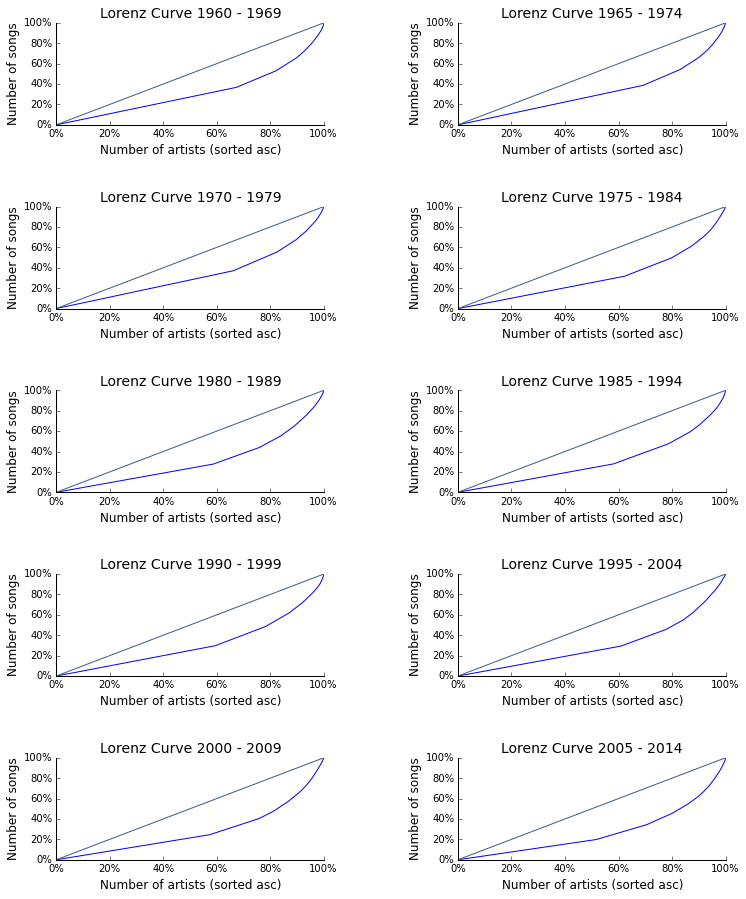

In [302]:
dsf.plot_multiple_lorenz_curves(billboard_df, start_year, end_year, 10, 5,
                                "Number of artists (sorted asc)",
                                "Number of songs", "Lorenz Curve",
                               "Images/lorenz_curves_multiple.png",
                               False)

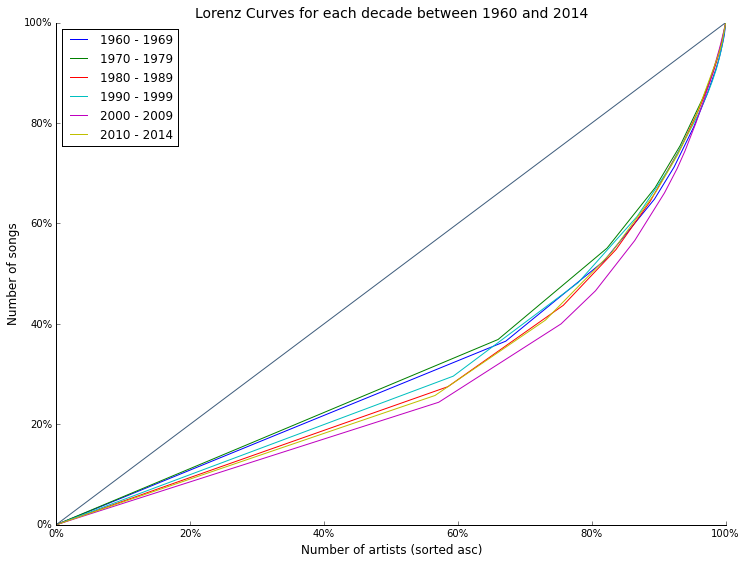

In [303]:
dsf.plot_multiple_lorenz_curves(billboard_df, start_year, end_year, 10, 10,
                                "Number of artists (sorted asc)",
                                "Number of songs", "Lorenz Curve",
                               "Images/lorenz_curves_multiple_subplot.png",
                               True)

In [292]:
reload(dsf)

<module 'dataStoryFunctions' from 'dataStoryFunctions.py'>

In [228]:
### Gini coefficient ###

# The formula is the following:
#    G = (N+1) / (N-1) - (2 / (N * (N - 1) * u)) * Sum(Pi * Xi)(for i = 1 to n)

# Where G is the coefficient we’re after, N is the number of samples, u is the mean 
# of the values, and P and X are respectively the rank and the number of songs 
# of the ith artist, ranked such that the highest number of songs ranks 1,
# and the lowest ranks N; 
# this way, that the last term in the equation is a sum of the products of
# each number of songs by its rank

In [253]:
gini_global = dsf.calculate_gini_coefficient(billboard_df, start_year, end_year + 1)
gini_global

0.45424950005166387

In [254]:
gini = dsf.calculate_gini_coefficient(billboard_df, 2010, 2011)
gini

0.25641791044776141

In [300]:
gini_coefficient_df = dsf.calculte_gini_per_year(billboard_df, start_year, end_year + 1, 1)
gini_coefficient_df.head()

,Year(s),Gini Coefficient
0,1960,0.207733
1,1961,0.174359
2,1962,0.114651
3,1963,0.155750
4,1964,0.235278


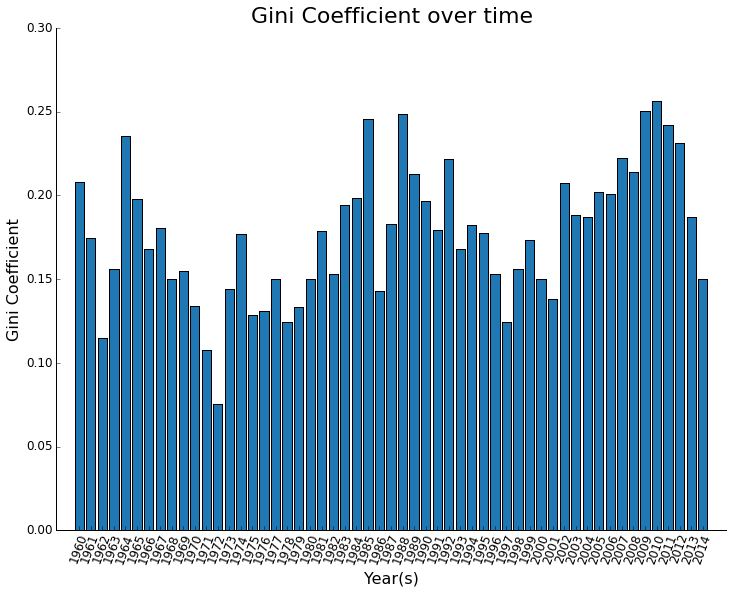

In [301]:
dsf.plot_gini_coefficient(gini_coefficient_df, "Year(s)",
                                "Gini Coefficient", "Gini Coefficient over time",
                               "Images/gini_coefficient_plot.png")

In [ ]:
### EchoNest API ###

In [379]:
reload(dsf)

<module 'dataStoryFunctions' from 'dataStoryFunctions.py'>

In [376]:
billboard_df_artist_count.head()

,Lead Artist(s),Counts
1244,Madonna,36
1252,Mariah Carey,29
1619,Rihanna,27
1885,The Beatles,26
636,Elton John,26


In [380]:
billboard_df_artist_count_with_additional_items = dsf.add_items_to_billboard_df_artist_count(billboard_df_artist_count, ["familiarity", "hotttnesss"])

The Time
Various artists
Original Cast of Godspell
Stevie Nicks & Tom Petty
The Jaynetts
Dottie West & Kenny Rogers
Lord David Dundas
Kenny Loggins & Stevie Nicks
Lil Jon & the East Side Boyz
Lil Jon & The East Side Boyz
Murray Head & The Trindad Singers
Neil Sedaka & Elton John
Neil Diamond & Barbra Streisand
Frank & Nancy Sinatra
Joan Jett & The Blackhearts


In [386]:
billboard_df_artist_count_with_additional_items.head()

,Lead Artist(s),Counts,familiarity,hotttnesss
1244,Madonna,36,0.834375,0.780054
1252,Mariah Carey,29,0.823746,0.817989
1619,Rihanna,27,0.849921,0.830018
1885,The Beatles,26,0.905476,0.775545
636,Elton John,26,0.826513,0.681196


In [440]:
billboard_df_artist_count_with_additional_items.to_csv('CSV_data/billboard_df_artist_count_with_additional_items.csv', sep=',') 